In [ ]:
!pip install tensorflow==2.0.0

In [1]:
import tensorflow
print(tensorflow.__version__)

2.0.0


In [2]:
import pandas as pd
import numpy as np
from random import shuffle
from tqdm import tqdm
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/SLR/sign_mnist_train/sign_mnist_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/SLR/sign_mnist_test/sign_mnist_test.csv")
categories = list(range(25))
categories.remove(9)
classes = len(categories)
IMG_SIZE = 28

In [4]:
# Returns a binary encoded label for each class
def get_label(category):
    label = np.zeros((classes,), dtype=int)
    for item in categories:
        if (item == category):
            label[categories.index(category)] = 1
            return label

def gen_data(pd_data, fileName = None):
    data = []
    for index, row in tqdm(pd_data.iterrows()):
        img_data = np.array(row.drop("label"))
        category = np.array(row["label"])
        label = get_label(category)
        data.append([img_data, label])
    shuffle(data)
    if fileName is not None:
        np.save(fileName+'.npy', data)
    return data

In [5]:
train_data = gen_data(train_data)
test_data = gen_data(test_data)

27455it [00:19, 1383.47it/s]
7172it [00:05, 1424.28it/s]


In [7]:
X_train = np.array([i[0] for i in train_data])/255.0
#print(X_train.shape[0])# prints 27455
X_train = np.reshape(X_train, (27455, IMG_SIZE, IMG_SIZE, 1))
Y_train = np.array([i[1] for i in train_data])
#print(X_train)

X_test = np.array([i[0] for i in test_data])/255.0
#print(X_test.shape[0])# prints 7172
X_test = np.reshape(X_test, (7172, IMG_SIZE, IMG_SIZE, 1))
Y_test = np.array([i[1] for i in test_data])

In [8]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=X_train.shape[1:]),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), padding='same'),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(classes, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
checkpoint = ModelCheckpoint('./drive/MyDrive/SLR/models/AlexNet-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only = True,
                             mode = 'auto')
history = model.fit(X_train, Y_train, epochs = 40, callbacks = [checkpoint], validation_split=0.2)
print(model.evaluate(X_test, Y_test))

Train on 21964 samples, validate on 5491 samples
Epoch 1/40
21952/21964 [============================>.] - ETA: 0s - loss: 1.3656 - accuracy: 0.6329WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./drive/MyDrive/SLR/models/AlexNet-001.model/assets
21964/21964 [==============================] - 482s 22ms/sample - loss: 1.3652 - accuracy: 0.6330 - val_loss: 0.9006 - val_accuracy: 0.7847
Epoch 2/40
21964/21964 [==============================] - 479s 22ms/sample - loss: 0.4479 - accuracy: 0.8951 - val_loss: 0.7078 - val_accuracy: 0.8155
Epoch 3/40
21964/21964 [==============================] - 470s 21ms/sample - loss: 0.3195 - accuracy: 0.9413 - v

In [10]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

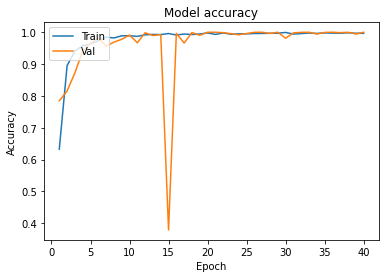

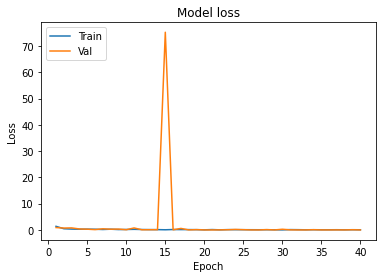

In [11]:
plot_learningCurve(history, 40)